In [1]:
import pandas as pd
import numpy as np
from AllFunctions import *
from numpy import log2, log, sqrt
import matplotlib.pyplot as plt
import random
from random import sample

In [2]:
# txtfile = open('bank/data-desc.txt', 'r')
# print(txtfile.read())

In [3]:
C = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 
 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
types = ['numeric', 'categorical', 'categorical', 'categorical', 'binary', 'numeric', 
                      'binary', 'binary', 'categorical', 'numeric', 'categorical', 'numeric', 
                      'numeric', 'numeric', 'numeric', 'categorical', 'binary']
dic= dict(zip(C, types))

In [4]:
train = pd.read_csv('bank/train.csv', names = C)
test = pd.read_csv('bank/test.csv', names = C)
#train.head()

In [5]:
median_dict = {}
Train_new =pd.DataFrame()
Test_new =pd.DataFrame()
for name in C:
    if dic[name] == 'numeric':
        M = train[name].median()
        median_dict[name] = M
        Train_new[name+ '>' + str(M)] = np.where(train[name]  > M, 'yes', 'no')
        Test_new[name+ '>' + str(M)] = np.where(test[name]  > M, 'yes', 'no')
    else:
        Train_new[name] = train[name]
        Test_new[name] = test[name]

In [6]:
Train = []
Label = []
for i in range(len(Train_new)):
    temp = list(Train_new.loc[i])
    Train.append(temp[:-1])
    Label.append(temp[-1])

In [7]:
Test = []
Test_Label = []
for i in range(len(Test_new)):
    temp = list(Test_new.loc[i])
    Test.append(temp[:-1])
    Test_Label.append(temp[-1])

In [8]:
for i in range(len(Label)):
    if Label[i] == 'yes':
        Label[i] = 1
    else:
        Label[i] = -1

In [9]:
for i in range(len(Test_Label)):
    if Test_Label[i] == 'yes':
        Test_Label[i] = 1
    else:
        Test_Label[i] = -1

In [10]:
atts = list(range(0,len(C)-1))

In [11]:
atts

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

### Bagged trees learning algorithm

In [12]:
def my_sample(train, train_labels, n_samples = None):
    if n_samples == None:
        n_samples = len(train_labels)
    s_train = []
    s_lable = []
    for i in range(0, n_samples):
        x = random.randint(0, n_samples-1)
        s_train.append(train[x])
        s_lable.append(train_labels[x])

    return s_train, s_lable

In [14]:
Bagged_trees = []
for x in range(1000):
    X, Y = my_sample(Train, Label)
    Bagged_trees.append (DT(X, Y, attss = [i for i in range(len(Train[0]))], depth = -1, randomness = None))

In [15]:
def Error_bagging(Forest, X, Y):
    
    n = len(Y)
    error = [0] * len(Forest)
    
    for i in range(n):
        count = {}
        majority = None
        Max = -1
        for j in range(len(Forest)):
            

            temp = Forest[j].predict(X[i]) 
            if temp not in count:
                count[temp] = 0
                
            count[temp] += 1
            if count[temp] > Max:
                Max = count[temp]
                majority = temp
        
            if majority != Y[i]:
                error[j] += 1/len(Y)
    return(error)

In [16]:
E_train = Error_bagging(Bagged_trees, Train, Label)

In [17]:
E_test = Error_bagging(Bagged_trees, Test, Test_Label)

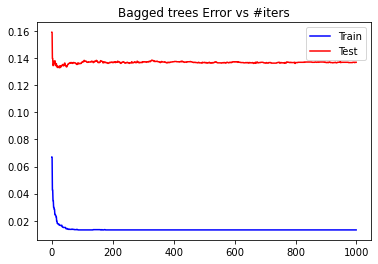

In [18]:
plt.plot(E_train, color ='blue', label = "Train")
plt.plot(E_test, color ='red', label = "Test")

plt.axis()
plt.title("Bagged trees Error vs #iters", color='black') 
plt.legend()
plt.show()